## Let's take a look at Harry Potter!

In [1]:
from os import listdir
from os.path import isfile, join
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from json import loads,load
from re import findall,UNICODE
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from database.bookclass import Book_raw_data
import pickle

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *

loading LabMT with stopVal=0.0, for 10222 words


In [2]:
# # all our essentials
# from matplotlib import rc,rcParams
# # rc('font', family='sans-serif') 
# # rc('font', serif='Helvetica Neue')
# # rc('text', usetex='false') 

# rc('font', family='serif')
# rc('font', family='cmr10')
# rc('text', usetex='false') 

# rcParams.update({'font.size': 12})
# import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
q = Book.objects.filter(title="Harry Potter and the Deathly Hallows")
if len(q) == 0:
    metadata = load(open("data/kindle/kindle-015/expanded/1e03e4aa6532f8833a0eefc64a9eb3c1/meta.json"))
    print(metadata)
    b = Book(title=metadata["title"],
            hash="1e03e4aa6532f8833a0eefc64a9eb3c1",
             language="en",
             lang_code_id=0,
             from_gutenberg=False,
             mobi_file_path="data/kindle/kindle-015/mobi/1e03e4aa6532f8833a0eefc64a9eb3c1.mobi",
             epub_file_path="data/kindle/kindle-015/epub/1e03e4aa6532f8833a0eefc64a9eb3c1.epub",
             txt_file_path="data/kindle/kindle-015/text/1e03e4aa6532f8833a0eefc64a9eb3c1.txt",
             expanded_folder_path="data/kindle/kindle-015/expanded/1e03e4aa6532f8833a0eefc64a9eb3c1",
            )
    b.save()
    for author in metadata["author(s)"].split("; "):
        a = Author.objects.get_or_create(fullname=author)
        a.save()
        b.authors.add(a)
    b.save()
else:
    print("already existed")
    b = q[0]
print(b)

already existed
Harry Potter and the Deathly Hallows


In [4]:
b_data = Book_raw_data(b)

In [5]:
data = b_data.chopper_sliding(my_LabMT,stop_val=1.0,num_points=500,return_centers=True)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

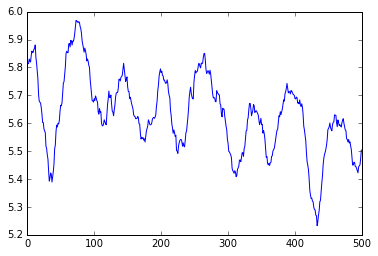

In [7]:
plt.plot(b_data.timeseries)
# plt.savefig("myfig3.png",dpi=600)

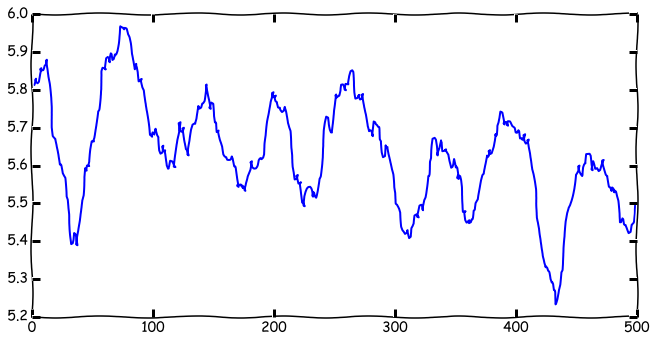

In [8]:
plt.xkcd()
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(b_data.timeseries)
# plt.savefig("myfig4.png",dpi=600)

In [10]:
def plot_varying_npoints(stopval):
    plt.figure(figsize=(15,15))
    ax = plt.subplot(4,1,1)
    min_size = 20000
    timeseries_100,all_fvecs,centers_100 = b_data.chopper_sliding(my_LabMT,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_200,all_fvecs,centers_200 = b_data.chopper_sliding(my_LabMT,num_points=200,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_500,all_fvecs,centers_500 = b_data.chopper_sliding(my_LabMT,num_points=500,min_size=min_size,stop_val=stop_val,return_centers=True)
    ax.plot(centers_100,timeseries_100,linestyle="-",marker="",color="0.5",markerfacecolor="0.1",markersize=3.5,zorder=3)
    ax.plot(centers_200,timeseries_200,linestyle="-",marker="",color="0.3",markerfacecolor="0.1",markersize=3.5,zorder=4)
    ax.plot(centers_500,timeseries_500,linestyle="-",marker="",color="0.1",markerfacecolor="0.1",markersize=3.5,zorder=5)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlabel("Words")
    ax.set_title("Happiness from sliding window of {} (20K,10K,5K,1K words, descending)".format(b.title))
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)

    ax = plt.subplot(4,1,2)
    min_size = 10000
    timeseries_100,all_fvecs,centers_100 = b_data.chopper_sliding(my_LabMT,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_200,all_fvecs,centers_200 = b_data.chopper_sliding(my_LabMT,num_points=200,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_500,all_fvecs,centers_500 = b_data.chopper_sliding(my_LabMT,num_points=500,min_size=min_size,stop_val=stop_val,return_centers=True)
    ax.plot(centers_100,timeseries_100,linestyle="-",marker="",color="0.5",markerfacecolor="0.1",markersize=3.5,zorder=3)
    ax.plot(centers_200,timeseries_200,linestyle="-",marker="",color="0.3",markerfacecolor="0.1",markersize=3.5,zorder=4)
    ax.plot(centers_500,timeseries_500,linestyle="-",marker="",color="0.1",markerfacecolor="0.1",markersize=3.5,zorder=5)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)

    ax = plt.subplot(4,1,3)
    min_size = 5000
    timeseries_100,all_fvecs,centers_100 = b_data.chopper_sliding(my_LabMT,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_200,all_fvecs,centers_200 = b_data.chopper_sliding(my_LabMT,num_points=200,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_500,all_fvecs,centers_500 = b_data.chopper_sliding(my_LabMT,num_points=500,min_size=min_size,stop_val=stop_val,return_centers=True)
    ax.plot(centers_100,timeseries_100,linestyle="-",marker="",color="0.5",markerfacecolor="0.1",markersize=3.5,zorder=3)
    ax.plot(centers_200,timeseries_200,linestyle="-",marker="",color="0.3",markerfacecolor="0.1",markersize=3.5,zorder=4)
    ax.plot(centers_500,timeseries_500,linestyle="-",marker="",color="0.1",markerfacecolor="0.1",markersize=3.5,zorder=5)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)

    ax = plt.subplot(4,1,4)
    min_size = 1000
    timeseries_100,all_fvecs,centers_100 = b_data.chopper_sliding(my_LabMT,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_200,all_fvecs,centers_200 = b_data.chopper_sliding(my_LabMT,num_points=200,min_size=min_size,stop_val=stop_val,return_centers=True)
    timeseries_500,all_fvecs,centers_500 = b_data.chopper_sliding(my_LabMT,num_points=500,min_size=min_size,stop_val=stop_val,return_centers=True)
    ax.plot(centers_100,timeseries_100,linestyle="-",marker="",color="0.5",markerfacecolor="0.1",markersize=3.5,zorder=3)
    ax.plot(centers_200,timeseries_200,linestyle="-",marker="",color="0.3",markerfacecolor="0.1",markersize=3.5,zorder=4)
    ax.plot(centers_500,timeseries_500,linestyle="-",marker="",color="0.1",markerfacecolor="0.1",markersize=3.5,zorder=5)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlabel("Words")
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)

    # plt.savefig("media/figures/"+str(b_data.isbn)+"-timeseries-comparison-{0:.0f}.png".format(stop_val*100),bbox_inches="tight")
    # plt.savefig("media/figures/"+str(b_data.isbn)+"-timeseries-comparison-{0:.0f}.pdf".format(stop_val*100),bbox_inches="tight")

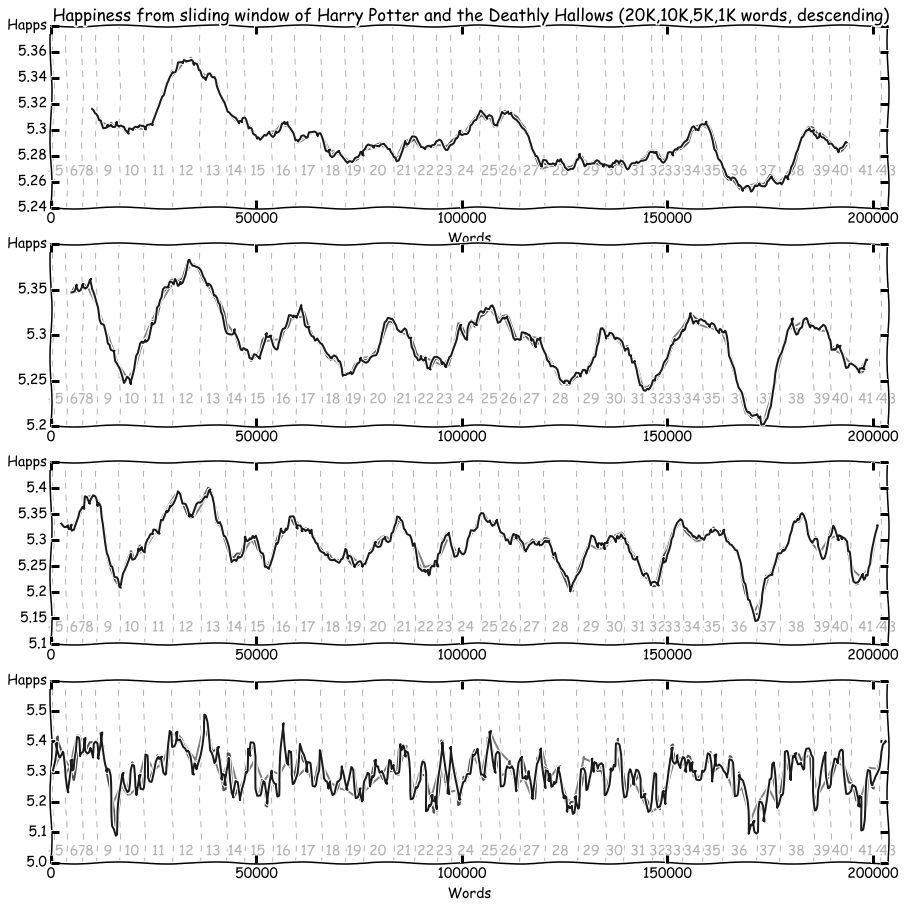

In [17]:
plot_varying_npoints(1.0)

In [25]:
def plot_varying_delh(npoints):
    plt.figure(figsize=(15,15))
    ax = plt.subplot(4,1,1)
    min_size = 20000
    for i,stop_val in enumerate(np.arange(0,2.25,.25)):
        timeseries,all_fvecs,centers = b_data.chopper_sliding(my_LabMT,num_points=npoints,min_size=min_size,stop_val=stop_val,return_centers=True)
        ax.plot(centers,timeseries,linestyle="-",color=str((10-i)/10.),zorder=i)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlabel("Words")
    ax.set_title("{}".format(b.title))
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])
    # ax.set_ylim([4.0,7.0])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)

    ax = plt.subplot(4,1,2)
    min_size = 10000
    for i,stop_val in enumerate(np.arange(0,2.25,.25)):
        timeseries,all_fvecs,centers = b_data.chopper_sliding(my_LabMT,num_points=npoints,min_size=min_size,stop_val=stop_val,return_centers=True)
        ax.plot(centers,timeseries,linestyle="-",color=str((10-i)/10.),zorder=i)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlabel("Words")
    ax.set_title("{}".format(b.title))
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])
    # ax.set_ylim([4.0,7.0])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)
        
    ax = plt.subplot(4,1,3)
    min_size = 5000
    for i,stop_val in enumerate(np.arange(0,2.25,.25)):
        timeseries,all_fvecs,centers = b_data.chopper_sliding(my_LabMT,num_points=npoints,min_size=min_size,stop_val=stop_val,return_centers=True)
        ax.plot(centers,timeseries,linestyle="-",color=str((10-i)/10.),zorder=i)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlabel("Words")
    ax.set_title("{}".format(b.title))
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])
    # ax.set_ylim([4.0,7.0])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)

    ax = plt.subplot(4,1,4)
    min_size = 1000
    for i,stop_val in enumerate(np.arange(0,2.25,.25)):
        timeseries,all_fvecs,centers = b_data.chopper_sliding(my_LabMT,num_points=npoints,min_size=min_size,stop_val=stop_val,return_centers=True)
        ax.plot(centers,timeseries,linestyle="-",color=str((10-i)/10.),zorder=i)
    new_ticks = [x for x in ax.yaxis.get_ticklocs()]
    ax.set_yticks(new_ticks)
    new_ticks[-1] = "Happs"
    ax.set_yticklabels(new_ticks)
    ax.set_xlabel("Words")
    ax.set_title("{}".format(b.title))
    ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])
    # ax.set_ylim([4.0,7.0])

    for i,end in enumerate(b_data.chapter_ends):
        ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
        ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)

    # plt.savefig("media/figures/"+str(b_data.isbn)+"-timeseries-comparison-{0:.0f}.png".format(stop_val*100),bbox_inches="tight")
    # plt.savefig("media/figures/"+str(b_data.isbn)+"-timeseries-comparison-{0:.0f}.pdf".format(stop_val*100),bbox_inches="tight")

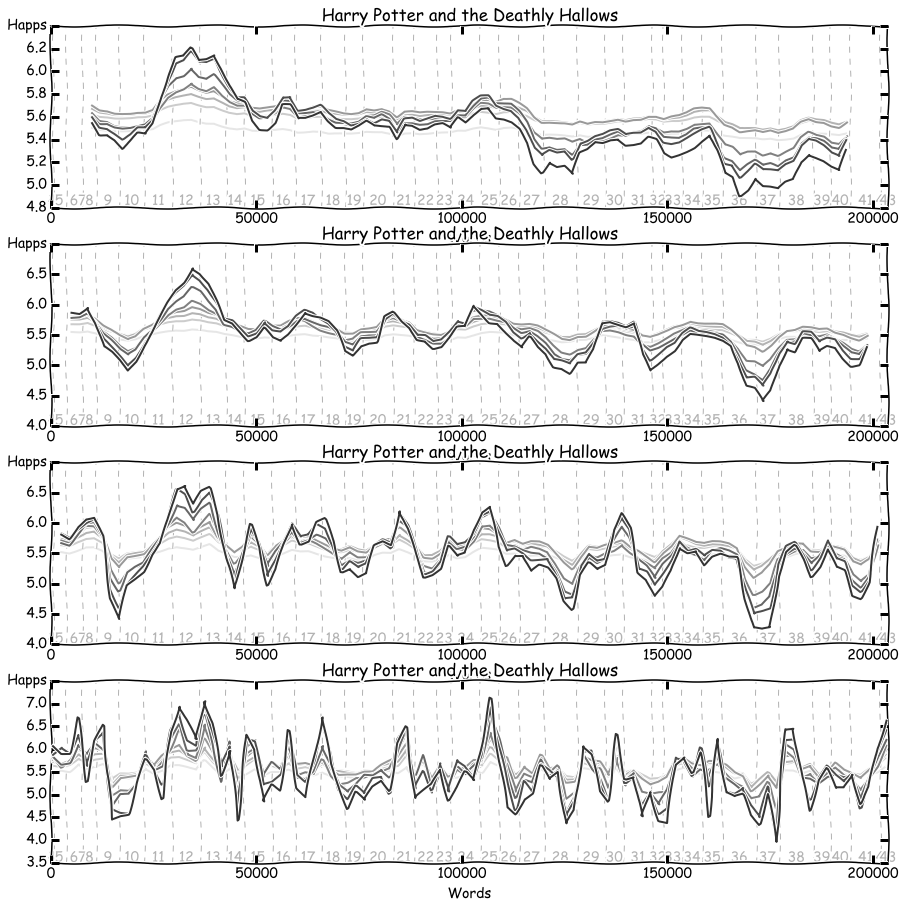

In [26]:
plot_varying_delh(100)

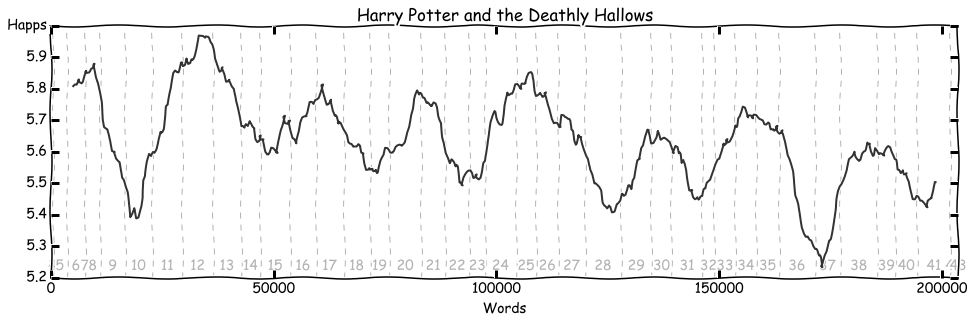

In [30]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_axes([.2,.2,.7,.7])
min_size = 10000
stop_val = 1.0
npoints = 500
timeseries,all_fvecs,centers = b_data.chopper_sliding(my_LabMT,num_points=npoints,min_size=min_size,stop_val=stop_val,return_centers=True)
ax.plot(centers,timeseries,linestyle="-",color=".2",zorder=2)
new_ticks = [x for x in ax.yaxis.get_ticklocs()]
ax.set_yticks(new_ticks)
new_ticks[-1] = "Happs"
ax.set_yticklabels(new_ticks)
ax.set_xlabel("Words")
ax.set_title("{}".format(b.title))
ax.set_xlim([b_data.chapter_beginnings[0],b_data.chapter_ends[-1]])
# ax.set_ylim([4.0,7.0])

for i,end in enumerate(b_data.chapter_ends):
    ax.plot([end,end],[ax.yaxis.get_ticklocs()[0],ax.yaxis.get_ticklocs()[-1]],'--',linewidth=1.0,color="0.7",zorder=1)
    ax.text(b_data.chapter_centers[i],ax.yaxis.get_ticklocs()[0]+0.025,i+1,horizontalalignment='center',color="0.7",zorder=1)